In [1]:
# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

from sympy import *
init_printing()

In [2]:
x = symbols('x')
n = symbols('n', integer = True, positive=True)
m = symbols('n', integer = True, nonnegative = True)

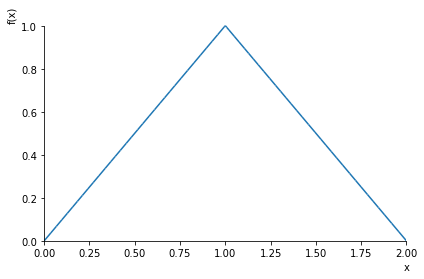

In [28]:
L = 2
f = Piecewise((x, x <1), (2-x, x >= 1))
plot(f,(x,0,L))

In [29]:
def main(n_sin,n_cos):
    bn = S(2)/L*integrate(f*sin(n*pi*x/L),(x,0,L))
    an = S(2)/L*integrate(f*cos(n*pi*x/L),(x,0,L))
    a0 = S(1)/L*integrate(f,(x,0,L))
    fousin = 0
    for i in range(1,n_sin+1):
        fousin += bn.subs(n,i)*sin(i*pi*x/L)
    
    foucos = a0
    for i in range(1,n_cos+1):
        foucos += an.subs(n,i)*cos(i*pi*x/L)
        
    p1 = plot(f,(x,0,L),show=False)
    p1[0].line_color = 'green'
    p2 = plot(fousin,(x,-L,L),show=False)
    p2[0].line_color = 'blue'
    p3 = plot(foucos,(x,-L,L),show=False)
    p3[0].line_color = 'red'
    p1.append(p2[0])
    p1.append(p3[0])
    p1.show()

In [30]:
interact(main, n_sin=IntSlider(min=0, max=16, step=1, value=0, description='Sinus series', style=style, layout=slider_layout),
               n_cos=IntSlider(min=0, max=16, step=1, value=0, description='Cosinus series', style=style, layout=slider_layout),
               );


interactive(children=(IntSlider(value=0, description='Sinus series', layout=Layout(width='99%'), max=16, style…